Text(0.5, 1.0, 'Intensity Transformed Image')

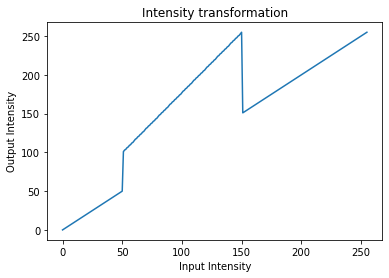

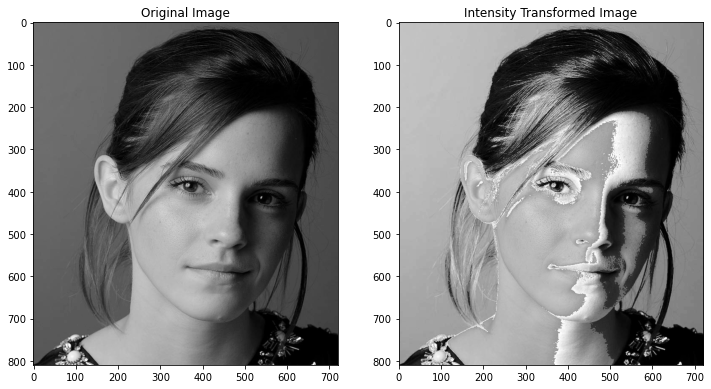

In [36]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

array_1 = np.array([ i for i in range(0,51)])
array_2 = np.array([ (155 / 100) * (i - 50) + 100 for i in range(51,151)])
array_3 = np.array([i for i in range(151,256)])
transform = np.concatenate((array_1, array_2, array_3),axis=0).astype(np.uint8)

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity transformation")
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")

im = cv.imread(r"emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert im is not None

transformed_image = cv.LUT(im, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(transformed_image, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Intensity Transformed Image")
